<a href="https://colab.research.google.com/github/faseycranco/stc510/blob/main/STC510_M3_Basics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"We want to know where different kinds of crimes are occurring, in which areas crime is growing fastest (or dropping fastest), and whether certain crimes are more common in certain areas of the city. Basically, we don't need maps or anything at this stage, just some data grouped by location (either the type of location or the zip codes) and some trend data."

In [110]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
df = pd.read_csv('crimestat (1).csv',quoting=csv.QUOTE_NONE)
df.columns = [col[1:-1] for col in df.columns]

The above brings in the .csv file as a dataframe and then deletes the double quotation marks frome the column titles. 

In [113]:
df.rename(columns={"OCCURRED ON":"OCCURED","UCR CRIME CATEGORY":"UCRCRIMECATEGORY"},inplace=True)

In [114]:
df

,INC NUMBER,OCCURED,OCCURRED TO,UCRCRIMECATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,"""201600000052855""",11/01/2015 00:00,01/09/2016 00:00,"""MOTOR VEHICLE THEFT""","""N 43RD AVE & W CACTUS RD""","""85029""","""SINGLE FAMILY HOUSE"""
1,"""201600000594484""",11/01/2015 00:00,NaN,"""RAPE""","""13XX E ALMERIA RD""","""85006""","""SINGLE FAMILY HOUSE"""
2,"""201500002102327""",11/01/2015 00:00,11/01/2015 09:00,"""LARCENY-THEFT""","""51XX N 15TH ST""","""85014""","""APARTMENT"""
3,"""201500002101405""",11/01/2015 00:00,11/01/2015 05:00,"""MOTOR VEHICLE THEFT""","""102XX W MEDLOCK AVE""","""85307""","""SINGLE FAMILY HOUSE"""
4,"""201500002102668""",11/01/2015 00:00,11/01/2015 11:50,"""MOTOR VEHICLE THEFT""","""69XX W WOOD ST""","""85043""","""SINGLE FAMILY HOUSE"""
...,...,...,...,...,...,...,...
131672,"""201700002027239""",11/17/2017 04:15,11/17/2017 04:30,"""LARCENY-THEFT""","""16XX E INDIAN SCHOOL RD""","""85016""","""CONVENIENCE MARKET / STORE"""
131673,"""201700002025582""",11/17/2017 05:00,11/17/2017 09:50,"""MOTOR VEHICLE THEFT""","""43XX N 103RD AVE""","""85037""","""APARTMENT"""
131674,"""201700002024523""",11/17/2017 05:34,NaN,"""AGGRAVATED ASSAULT""","""8XX N 59TH AVE""","""85043""","""ABANDONED/CONDEMNED STRUCTURE"""
131675,"""201700002030009""",11/17/2017 05:50,11/17/2017 07:50,"""BURGLARY""","""51XX N 39TH DR""","""85019""","""SINGLE FAMILY HOUSE"""


The following then sorts the .csv data primarily by zipcode and secondarily by crime catagory. 

In [115]:
df.sort_values(by=['ZIP','UCRCRIMECATEGORY'],ascending=[False,False],inplace=True)
df

,INC NUMBER,OCCURED,OCCURRED TO,UCRCRIMECATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
113612,"""201700001423294""",08/10/2017 17:00,08/11/2017 15:00,"""MOTOR VEHICLE THEFT""","""75XX W THOMAS RD""","""85396""","""PARKING LOT"""
115872,"""201700001479521""",08/23/2017 00:00,NaN,"""LARCENY-THEFT""","""5XX W THOMAS RD""","""85396""","""PARKING LOT"""
125511,"""201700001816063""",10/14/2017 19:00,10/15/2017 00:30,"""LARCENY-THEFT""","""42XX W THOMAS RD""","""85396""","""OFFICE / COMMERCIAL BUILDING"""
109197,"""201700001371092""",07/17/2017 11:21,08/06/2017 12:19,"""BURGLARY""","""61XX W THOMAS RD""","""85396""","""APARTMENT"""
16316,"""201600000224128""",02/05/2016 16:15,NaN,"""RAPE""","""136XX W MCDOWELL RD""","""85395""","""UNKNOWN"""
...,...,...,...,...,...,...,...
130126,"""201700001966294""",11/07/2017 22:15,NaN,"""AGGRAVATED ASSAULT""","""4XX W VAN BUREN ST""","""85003""","""BAR / LOUNG / NIGHT CLUB"""
130536,"""201700001982153""",11/10/2017 13:12,11/10/2017 13:12,"""AGGRAVATED ASSAULT""","""3XX W CULVER ST""","""85003""","""STREET / ROADWAY / ALLEY / SIDEWALK"""
63086,"""201700001136425""",11/04/2016 00:00,06/25/2017 00:00,"""RAPE""","""451XX W RHEA RD""",NaN,"""APARTMENT"""
79792,"""201700000206086""",02/04/2017 10:00,02/04/2017 10:14,"""LARCENY-THEFT""","""XX W BASELINE AVE""",NaN,"""SPECIALTY STORE"""


The following groups the .csv data by zip codes.

In [116]:
df.ZIP.value_counts()
crimes_by_zip = df.groupby(['ZIP'])

When ran, the following will ask for a zipcode. When one is entered, it will display all crimes from that zip code. 

In [106]:
print('Please enter a Phoenix zip code:')
crimes_by_zip.get_group('"'+input()+'"')

Please enter a Phoenix zip code:
85396


,INC NUMBER,OCCURRED ON,OCCURRED TO,UCRCRIMECATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
113612,"""201700001423294""",08/10/2017 17:00,08/11/2017 15:00,"""MOTOR VEHICLE THEFT""","""75XX W THOMAS RD""","""85396""","""PARKING LOT"""
115872,"""201700001479521""",08/23/2017 00:00,NaN,"""LARCENY-THEFT""","""5XX W THOMAS RD""","""85396""","""PARKING LOT"""
125511,"""201700001816063""",10/14/2017 19:00,10/15/2017 00:30,"""LARCENY-THEFT""","""42XX W THOMAS RD""","""85396""","""OFFICE / COMMERCIAL BUILDING"""
109197,"""201700001371092""",07/17/2017 11:21,08/06/2017 12:19,"""BURGLARY""","""61XX W THOMAS RD""","""85396""","""APARTMENT"""


A graph of the most popular crimes. 

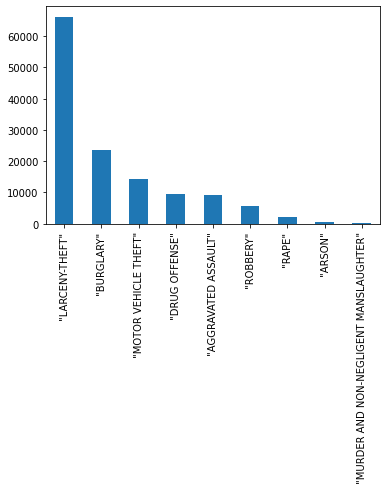

In [126]:
df.UCRCRIMECATEGORY.value_counts().plot.bar()

The following will export a .csv of the count of crimes at all recorded zip codes as there are too many to fit on a graph.  

In [130]:
crimerate_by_zip = df.ZIP.value_counts()
crimerate_by_zip.to_csv('crimerates by zip.csv')